In [1]:
!pwd

/Users/Puneetha_Pai/learning/dvc_session/notebooks


In [2]:
path = '../'
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
df = pd.read_csv(f'{path}/data/iris.csv')
df.T.head(), df.shape

(              0    1    2    3    4    5    6    7    8    9    ...  140  141  \
 sepal length  5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  4.4  4.9  ...  6.7  6.9   
 sepal width   3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4  2.9  3.1  ...  3.1  3.1   
 petal length  1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5  1.4  1.5  ...  5.6  5.1   
 petal width   0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2  0.2  0.1  ...  2.4  2.3   
 class         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.0  2.0   
 
               142  143  144  145  146  147  148  149  
 sepal length  5.8  6.8  6.7  6.7  6.3  6.5  6.2  5.9  
 sepal width   2.7  3.2  3.3  3.0  2.5  3.0  3.4  3.0  
 petal length  5.1  5.9  5.7  5.2  5.0  5.2  5.4  5.1  
 petal width   1.9  2.3  2.5  2.3  1.9  2.0  2.3  1.8  
 class         2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  
 
 [5 rows x 150 columns],
 (150, 5))

In [4]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.intercept_, model.coef_, model.score(X_train, y_train), model.score(X_test, y_test)

/Users/Puneetha_Pai/.virtualenvs/ai-studio/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([  9.34921034,   3.79920268, -13.14841303]),
 array([[-0.43668979,  0.85426312, -2.30827507, -0.9934252 ],
        [ 0.34200904, -0.7169259 , -0.09699032, -0.89882609],
        [ 0.09468075, -0.13733722,  2.40526539,  1.89225129]]),
 0.9916666666666667,
 0.8666666666666667)

In [6]:
import numpy as np
np.abs(model.coef_).sum(axis=0)

array([0.87337959, 1.70852624, 4.81053078, 3.78450257])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

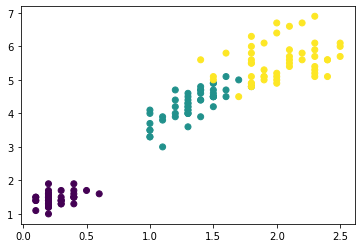

In [8]:
plt.scatter(X.iloc[:, -1], X.iloc[:, -2], c=y)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

In [10]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [11]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

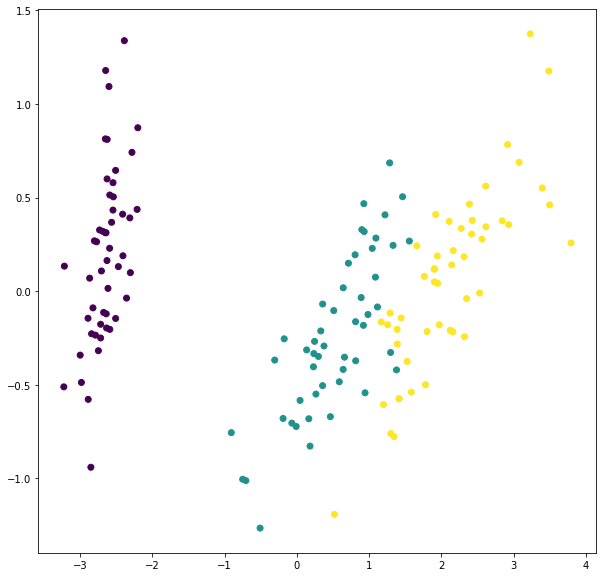

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

In [13]:
def fit_model(X: np.ndarray, y: np.ndarray, model=LogisticRegression()):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
    model.fit(X_train, y_train)
    print(f'Training Accuracy: {model.score(X_train, y_train)}')
    print(f'Testing Accuracy : {model.score(X_test, y_test)}')
    return model

old_model = fit_model(X, y, LogisticRegression())
new_model = fit_model(X_pca, y, LogisticRegression())

Training Accuracy: 0.9916666666666667
Testing Accuracy : 0.8666666666666667
Training Accuracy: 0.975
Testing Accuracy : 0.8666666666666667


/Users/Puneetha_Pai/.virtualenvs/ai-studio/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.ensemble.forest import RandomForestClassifier

old_model = fit_model(X, y, RandomForestClassifier(n_estimators=10, n_jobs=-1, max_samples=30))
new_model = fit_model(X_pca, y, RandomForestClassifier(n_estimators=10, n_jobs=-1, max_samples=30))

Training Accuracy: 1.0
Testing Accuracy : 0.8666666666666667
Training Accuracy: 0.9583333333333334
Testing Accuracy : 0.8


/Users/Puneetha_Pai/.virtualenvs/ai-studio/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
from sklearn.svm import LinearSVC

old_model = fit_model(X, y, LinearSVC())
new_model = fit_model(X_pca, y, LinearSVC())

Training Accuracy: 0.975
Testing Accuracy : 0.8
Training Accuracy: 0.95
Testing Accuracy : 0.8666666666666667


/Users/Puneetha_Pai/.virtualenvs/ai-studio/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [16]:
from sklearn.ensemble import VotingClassifier

estimators = dict(
    l_regression=LogisticRegression(),
    r_forrest=RandomForestClassifier(n_estimators=10, n_jobs=-1, max_samples=30),
    l_svc=LinearSVC()
)

fit_model(X, y, VotingClassifier(estimators.items()))
fit_model(X_pca, y, VotingClassifier(estimators.items()))

/Users/Puneetha_Pai/.virtualenvs/ai-studio/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Puneetha_Pai/.virtualenvs/ai-studio/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training Accuracy: 0.9916666666666667
Testing Accuracy : 0.8666666666666667
Training Accuracy: 0.9583333333333334
Testing Accuracy : 0.8666666666666667


VotingClassifier(estimators=dict_items([('l_regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('r_forrest', RandomForestClassifier(bootstrap=True, ccp_al...
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)), ('l_svc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]),
                 flatten_transform=True, n_jobs=None, voting='hard',
                 weights=None)

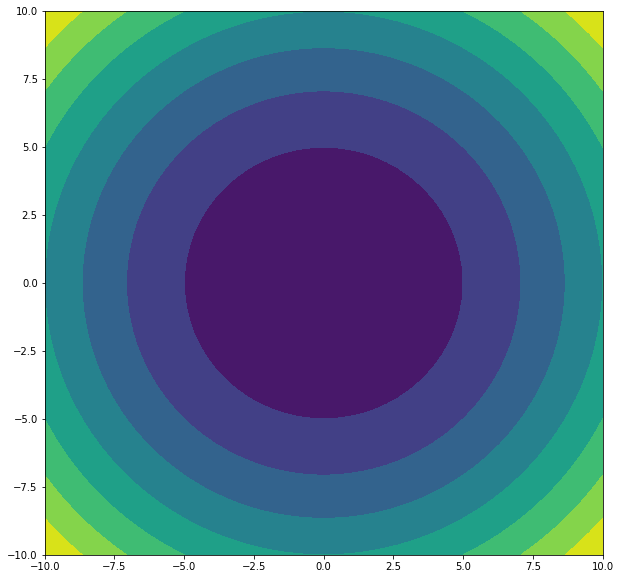

In [21]:
b = a = np.linspace(-10, 10, num=50)
# b = 2 * a * a + 1
p, q = np.meshgrid(a, b)
# z = model.predict(np.c_[p.ravel(), q.ravel()])
z = [ (x**2 + y**2) for x, y in np.c_[p.ravel(), q.ravel()]]
z = np.array(z).reshape(p.shape)
plt.figure(figsize=(10, 10))
plt.contourf(p, q, z)

Training Accuracy: 0.975
Testing Accuracy : 0.8666666666666667
Training Accuracy: 0.95
Testing Accuracy : 0.8666666666666667
Training Accuracy: 0.975
Testing Accuracy : 0.8
Training Accuracy: 0.9666666666666667
Testing Accuracy : 0.8666666666666667


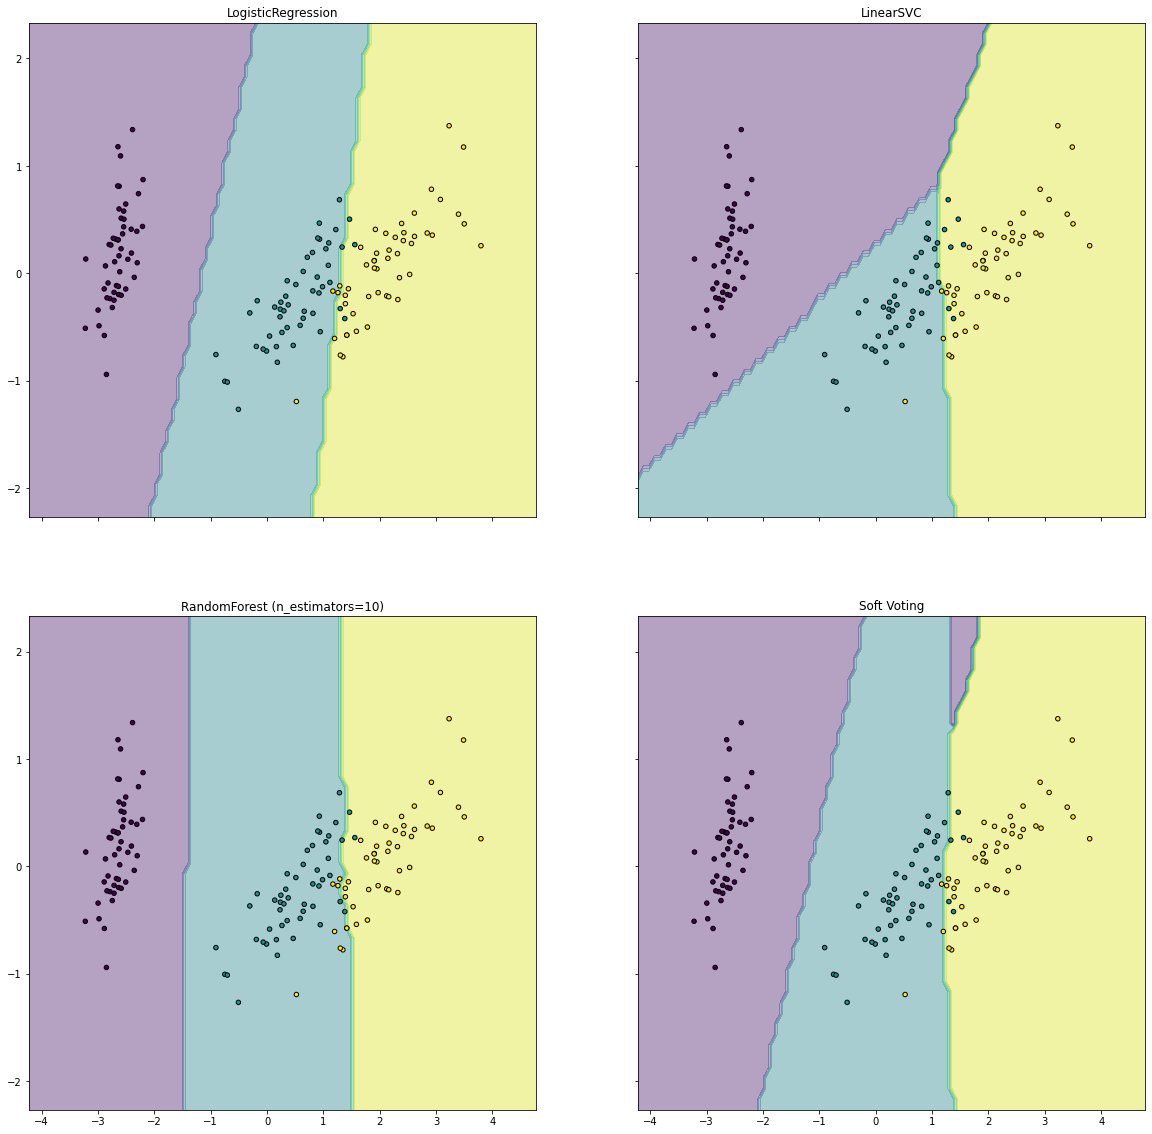

In [22]:
from itertools import product

estimators = dict(
    l_regression=LogisticRegression(),
    r_forrest=RandomForestClassifier(n_estimators=10, n_jobs=-1, max_samples=30),
    l_svc=LinearSVC()
)

X, y = X_pca, df.iloc[:, -1]
 
clf1 = fit_model(X_pca, y, LogisticRegression())
clf2 = fit_model(X_pca, y, LinearSVC())
clf3 = fit_model(X_pca, y, RandomForestClassifier(n_estimators=10, n_jobs=-1, max_samples=30))
eclf = fit_model(X, y, VotingClassifier(estimators.items()))

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(20, 20))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['LogisticRegression', 'LinearSVC', 'RandomForest (n_estimators=10)', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()